In [89]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.metrics import confusion_matrix

In [4]:
book_dtf = pd.read_csv("C:/Users/joann/Downloads/newProject/Data_Cleaning/NLTK.csv")

In [13]:
book_dtf.head()

,Popularity,User_Reviews,Stars_Ratings,Diff_Ratings,Num_Tokenized_Words,Average_WordLength,Average_WordsinSentence,Percentage_Verbs,Percentage_Nouns,Percentage_AdjAdverb,Quote,Sentiment_Score,Tokenized_Words
0,0,18,5,0.46,14,3.500000,4.666667,0.285714,0.214286,0.071429,1,0.0000,"['prince', 'read', 'find', 'say', 'never', 'gu..."
1,0,18,5,0.53,67,4.611940,7.444444,0.134328,0.268657,0.134328,0,0.8591,"['spoiler', 'alert', 'little', 'memorial', 'fa..."
2,0,18,5,0.47,5,3.000000,2.500000,0.000000,0.400000,0.000000,0,0.5550,"['one', 'fav', 'book']"
3,0,18,5,1.14,337,4.038576,16.850000,0.225519,0.189911,0.148368,0,0.9861,"['spoiler', 'alert', 'oh', 'goodness', 'one', ..."
4,0,18,4,-0.11,52,3.807692,17.333333,0.326923,0.153846,0.115385,0,0.8807,"['think', 'great', 'educational', 'book', 'rea..."


In [17]:
#Split the dataset into 85% train set and 15% test set
#Integer is inserted to random_state to reproduce the same split everytime it is run
X_train, X_test, y_train, y_test = train_test_split(book_dtf.drop(columns=["Popularity"]), book_dtf["Popularity"],
                                                    test_size = 0.15, random_state = 229)

In [18]:
#First try to predict popularity with Non-Textual features: User_Reviews, Diff_Ratings, Stars_Ratings
X_train = X_train[["User_Reviews","Stars_Ratings","Diff_Ratings"]]

In [19]:
# Instantiate the XGBRegressor Model
# Objective = "Binary:Logitic" is used for logistic regression for binary classification (Statistical Analysis method to predict a binary outcome, such as yes or no)

# Evaluation Matrix (eval_matrix) is set to "error"
    # Calculate #(wrong case)/#(all cases). For the predictions, the evalution will regard the instances with
    # prediction value larger than 0.5 as positive instances, and the others as negative instances

# Seed variable is specified to reproduce the same result everytime the code is run
xgb_model = xgb.XGBRegressor(objective='binary:logistic', eval_metric='error', seed=229, n_jobs=-1)

In [22]:
#Parameters to try
parameters = {
    'n_estimators': (50,100,1000),
    'max_depth': (2,4,6),
    'learning_rate': (0.01, 0.1, 0.3)
}

#ShuffleSplit is used to randomly sample dataset during each iteration in order to generate a training and test set.
# n_splits set to 1, because dataset is only split to test set and train set
#test_size represents the proportion of the dataset to include in the test split. test set will be 20% of the overall data 
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=229)

#GridSearchCV loops through the predefined parameters, and use it to fit the model on the training set.
#This way, the best parameters can be selected 
GridSearch_xgb_model = GridSearchCV(xgb_model,parameters, cv= ss )

In [23]:
#Train the model to predict Popularity based on Non-Textual features
GridSearch_xgb_model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.2, train_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False,
                                    eval_metric='error', gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_de...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None,
                                    random_stat

In [24]:
#See which parameters best fit this model
print(GridSearch_xgb_model.best_params_)

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 1000}


In [82]:
#Checking how good the predictions are on the Train Set.   
X_train = X_train[["User_Reviews","Stars_Ratings","Diff_Ratings"]]
y_train_pred = GridSearch_xgb_model.predict(X_train)
y_train_pred = list(map(round,y_train_pred))

<AxesSubplot:>

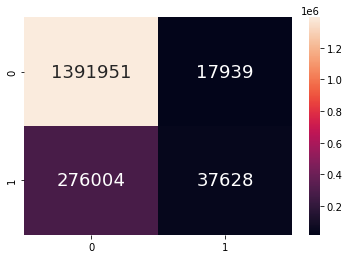

In [83]:
#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [84]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8294521334801644
TPR Train :	 0.11997500255076013
TNR Train :	 0.9872763123364234
FPR Train :	 0.01272368766357659
FNR Train :	 0.8800249974492399


In [85]:
book_dtf["Popularity"].value_counts()

0    1658554
1     369119
Name: Popularity, dtype: int64

# Analysis of train_set prediction
Has quite high TNR and FNR, and low TPR as well as FPR.

High TNR means high percentage of the model predicting review isn't popular
Low  TPR means low percentage of the model predicting review is popular (maybe because of the distribution, there's more data for not popular than for popular)

High FNR theres a high chance that popular reviews is predicted as not-popular (maybe because of distribution again)
Low FPR means theres a low chance that not-popular reviews is predicted as popular 

In [90]:
#Checking how good the predictions are on the Test Set.   
X_test = X_test[["User_Reviews","Stars_Ratings","Diff_Ratings"]]
y_test_pred = GridSearch_xgb_model.predict(X_test)
y_test_pred = list(map(round,y_test_pred))

<AxesSubplot:>

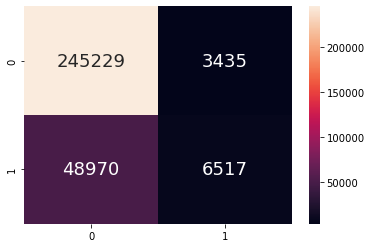

In [91]:
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [93]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8277007144477578
TPR Train :	 0.11745093445311515
TNR Train :	 0.9861861789402567
FPR Train :	 0.013813821059743268
FNR Train :	 0.8825490655468848


Difference in percentage from test and train is more or less the same, so can rest assured not overfitting. Analysis more or less the same as train dataset

[0.48971513 0.39927858 0.1110063 ]


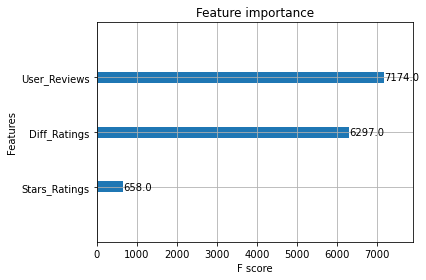

In [103]:
#Feature importance provides a score that indicates how useful each future is in the construction of the boosted decision trees within the model.
#Higher score implies that the attribute is used more to make key decision with decision trees, thus it has higher relative importance
print(GridSearch_xgb_model.best_estimator_.feature_importances_)
#Number shows weight which is the is the number of times a feature appears in a tree
xgb.plot_importance(GridSearch_xgb_model.best_estimator_)
plt.tight_layout()

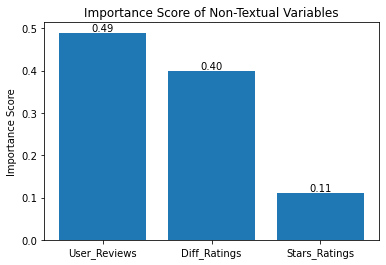

In [122]:
#Bar Plot to show Importance Score of each Non-Textual variables
variables = ('User_Reviews', 'Diff_Ratings', 'Stars_Ratings')
fig, ax = plt.subplots()
rects1 = ax.bar(variables, GridSearch_xgb_model.best_estimator_.feature_importances_, label = "Importance Score")
ax.set_ylabel('Importance Score')
ax.set_title('Importance Score of Non-Textual Variables')
ax.bar_label(rects1, fmt='%.2f')
plt.show()

In [146]:
#Split the dataset into 85% train set and 15% test set
#Integer is inserted to random_state to reproduce the same split everytime it is run
X_train, X_test, y_train, y_test = train_test_split(book_dtf.drop(columns=["Popularity"]), book_dtf["Popularity"],
                                                    test_size = 0.15, random_state = 229)

In [124]:
book_dtf.head()

,Popularity,User_Reviews,Stars_Ratings,Diff_Ratings,Num_Tokenized_Words,Average_WordLength,Average_WordsinSentence,Percentage_Verbs,Percentage_Nouns,Percentage_AdjAdverb,Quote,Sentiment_Score,Tokenized_Words
0,0,18,5,0.46,14,3.500000,4.666667,0.285714,0.214286,0.071429,1,0.0000,prince read find say never guess
1,0,18,5,0.53,67,4.611940,7.444444,0.134328,0.268657,0.134328,0,0.8591,spoiler alert little memorial favorite teacher...
2,0,18,5,0.47,5,3.000000,2.500000,0.000000,0.400000,0.000000,0,0.5550,one fav book
3,0,18,5,1.14,337,4.038576,16.850000,0.225519,0.189911,0.148368,0,0.9861,spoiler alert oh goodness one absolute favorit...
4,0,18,4,-0.11,52,3.807692,17.333333,0.326923,0.153846,0.115385,0,0.8807,think great educational book read forth grade ...


In [143]:
#Try to predict popularity with Textual features:
    #Num_Tokenized_Words, Average_WordLength, Average_WordsinSentence,Percentage_Verbs,
    #Percentage_Nouns, Percentage_AdjAdverb, Quote, Sentiment_Score
X_train = X_train[["Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]

In [131]:
#Perform fitting using the same conditions and parameters as Non-Textual features
GridSearch_xgb_model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.2, train_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False,
                                    eval_metric='error', gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_de...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None,
                                    random_stat

In [136]:
#Checking how good the predictions are on the Train Set.   
X_train = X_train[["Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]
y_train_pred = GridSearch_xgb_model.predict(X_train)
y_train_pred = list(map(round,y_train_pred))

<AxesSubplot:>

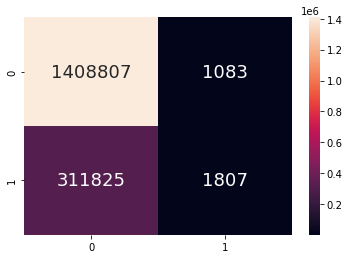

In [137]:
#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [138]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8184485025430485
TPR Train :	 0.00576152943577186
TNR Train :	 0.9992318549674089
FPR Train :	 0.0007681450325911951
FNR Train :	 0.9942384705642281


In [148]:
#Checking how good the predictions are on the Test Set.   
X_test = X_test[["Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]
y_test_pred = GridSearch_xgb_model.predict(X_test)
y_test_pred = list(map(round,y_test_pred))

<AxesSubplot:>

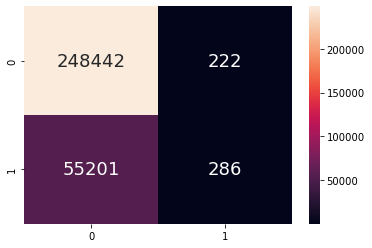

In [149]:
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [150]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8177780115797745
TPR Train :	 0.005154360480833348
TNR Train :	 0.9991072290319467
FPR Train :	 0.0008927709680532767
FNR Train :	 0.9948456395191666


[0.70230234 0.06850842 0.02030925 0.05225765 0.06049747 0.02732718
 0.04774781 0.02104987]


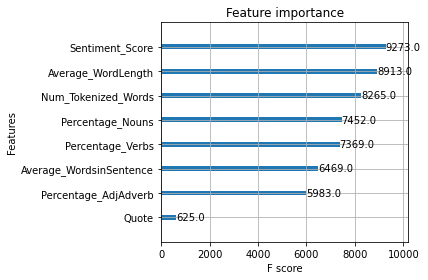

In [151]:
#Feature importance provides a score that indicates how useful each future is in the construction of the boosted decision trees within the model.
#Higher score implies that the attribute is used more to make key decision with decision trees, thus it has higher relative importance
print(GridSearch_xgb_model.best_estimator_.feature_importances_)
#Number shows weight which is the is the number of times a feature appears in a tree
xgb.plot_importance(GridSearch_xgb_model.best_estimator_)
plt.tight_layout()

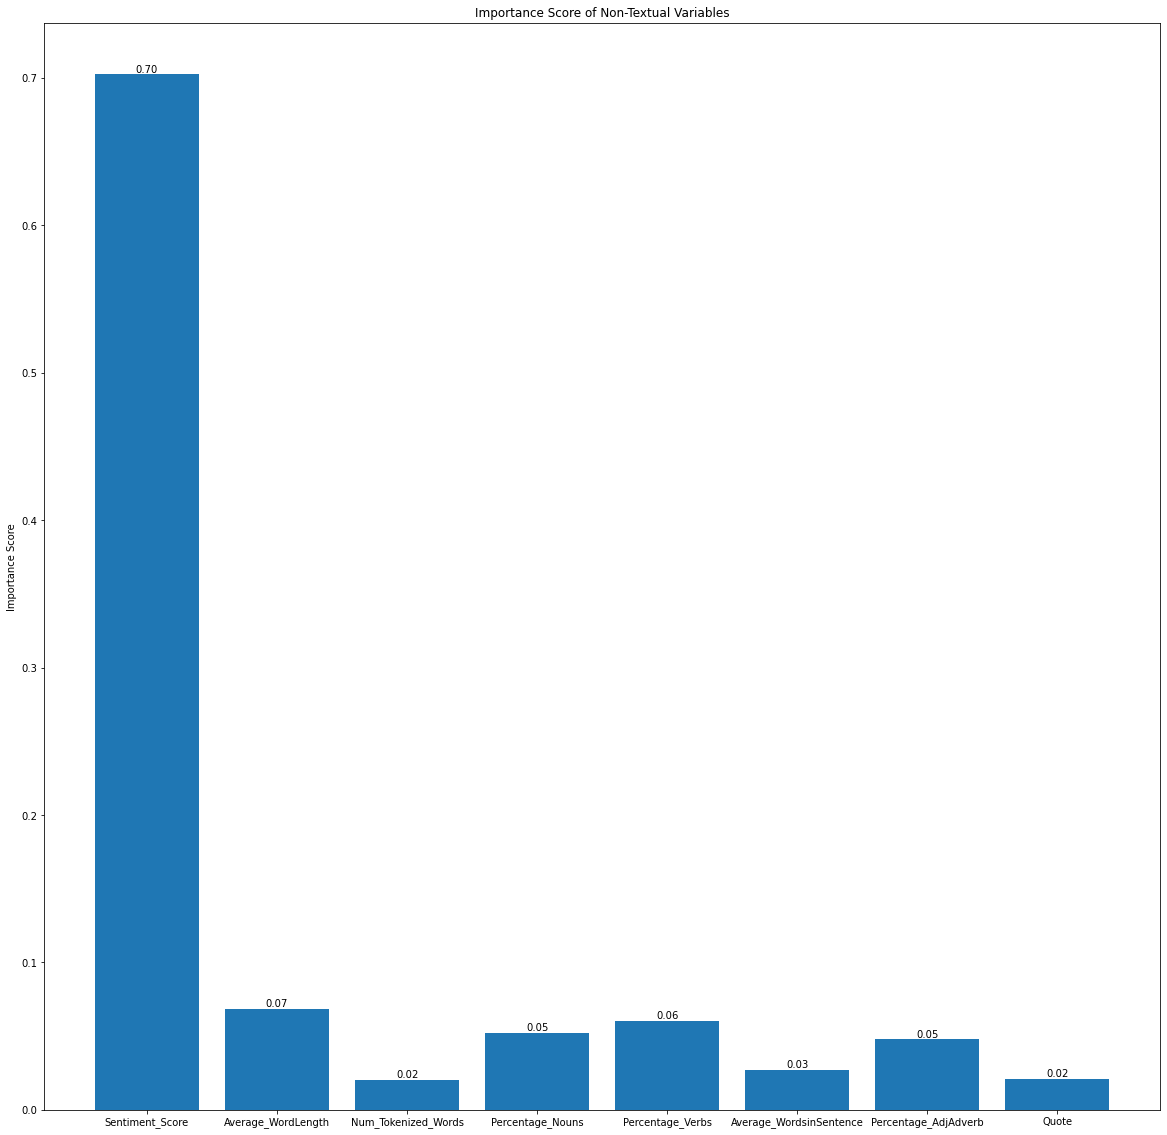

In [165]:
#Bar Plot to show Importance Score of each Non-Textual variables
variables = ('Sentiment_Score', 'Average_WordLength', 'Num_Tokenized_Words', "Percentage_Nouns", "Percentage_Verbs", "Average_WordsinSentence", "Percentage_AdjAdverb", "Quote" )
fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(variables, GridSearch_xgb_model.best_estimator_.feature_importances_, label = "Importance Score", align = "center")

ax.set_ylabel('Importance Score')
ax.set_title('Importance Score of Non-Textual Variables')
ax.bar_label(rects1, fmt='%.2f')
plt.show()


# Analysis of train and test data of Textual characteristics

Both have high TNR and FNR, and low TPR and FPR 


# Analysis of Textual and Non-Textual prediction
Both exhibit same characteristics (high in TNR and FNR, as well as lower in TPR and FPR)

Accuracy of prediction with Non-Textual prediction is generally higher (0.82) compared to Textual charactertics(0.81). 

However, Textual prediction has a higher TNR (0.99) and FNR (0.99) compared to Non-textual prediction - TNR(0.98), FNR(0.88)

Textual prediction has much lower TPR (0.006) and FPR (0.0009) compared to Non-textual prediction TPR (0.12) and FPR (0.01)


This suggest that non-Textual prediction is better at sorting popular reviews (the review at which we have little data of)
- It has higher TPR - higher percentage of model predicting correctly when review is popular
- And lower FNR - less mistake of mis-predicting the popular review as notTex-popular
 
Textual-Reviews on the other hand is much better at handling non-popular reviews
- Higher TNR - higher percentage of model predicting correctly when review isn't popular
- and Lower FNR - which means less mistake of mis-predicting non-popular review as popular
 
# Conclusion:
If we were to choose between Textual or Non-Textual characteristics for prediction, Non-Textual characteritics is better, because it generally has a higher accuracy. Plus, its more accurate in their prediction when the review is popular, when only 18.2% of our dataset is of popular reviews (highly undersampled)

In [181]:
#Split the dataset into 85% train set and 15% test set
#Integer is inserted to random_state to reproduce the same split everytime it is run
X_train, X_test, y_train, y_test = train_test_split(book_dtf.drop(columns=["Popularity"]), book_dtf["Popularity"],
                                                    test_size = 0.15, random_state = 229)

In [167]:
#Now let's try to predict using both Textual and Non-textual characteristics
X_train = X_train[["User_Reviews","Stars_Ratings","Diff_Ratings", "Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]

In [169]:
#Perform fitting using the same conditions and parameters as Non-Textual features
GridSearch_xgb_model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=229, test_size=0.2, train_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False,
                                    eval_metric='error', gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_de...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None,
                                    objective='binary:logistic', predictor=None,
                                    random_stat

In [171]:
#See which parameters best fit this model
print(GridSearch_xgb_model.best_params_)

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}


In [182]:
#Checking how good the predictions are on the Train Set.   
X_train = X_train[["User_Reviews","Stars_Ratings","Diff_Ratings", "Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]
y_train_pred = GridSearch_xgb_model.predict(X_train)
y_train_pred = list(map(round,y_train_pred))

<AxesSubplot:>

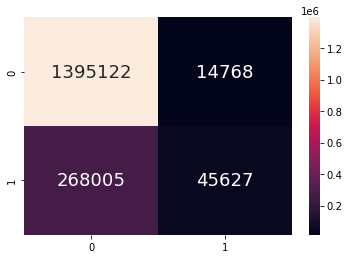

In [183]:
#Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [184]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8359330487223255
TPR Train :	 0.145479415365779
TNR Train :	 0.9895254239692458
FPR Train :	 0.010474576030754173
FNR Train :	 0.854520584634221


In [185]:
#Checking how good the predictions are on the Test Set.   
X_test = X_test[["User_Reviews","Stars_Ratings","Diff_Ratings", "Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence", "Percentage_Verbs",
                   "Percentage_Nouns","Percentage_AdjAdverb", "Quote","Sentiment_Score"]]
y_test_pred = GridSearch_xgb_model.predict(X_test)
y_test_pred = list(map(round,y_test_pred))

<AxesSubplot:>

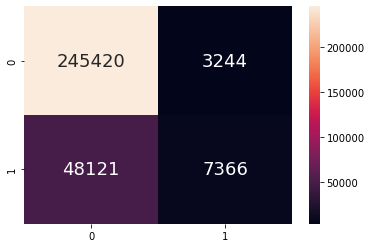

In [186]:
# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [187]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Test Data:
Accuracy  :	 0.8311200686501113
TPR Train :	 0.13275181574062392
TNR Train :	 0.9869542836920503
FPR Train :	 0.013045716307949684
FNR Train :	 0.8672481842593761


[0.2780863  0.17808096 0.06357522 0.19172649 0.05182869 0.03217863
 0.04134887 0.03785759 0.03086298 0.06668603 0.0277681 ]


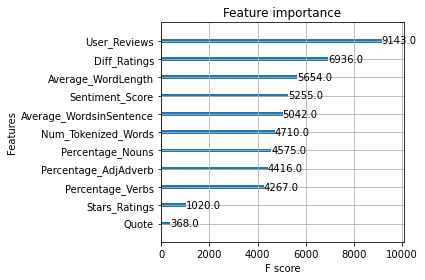

In [188]:
#Feature importance provides a score that indicates how useful each future is in the construction of the boosted decision trees within the model.
#Higher score implies that the attribute is used more to make key decision with decision trees, thus it has higher relative importance
print(GridSearch_xgb_model.best_estimator_.feature_importances_)
#Number shows weight which is the is the number of times a feature appears in a tree
xgb.plot_importance(GridSearch_xgb_model.best_estimator_)
plt.tight_layout()

[0.2780863, 0.19172649, 0.17808096, 0.06668603, 0.063575216, 0.051828694, 0.04134887, 0.03785759, 0.032178633, 0.030862976, 0.027768102]


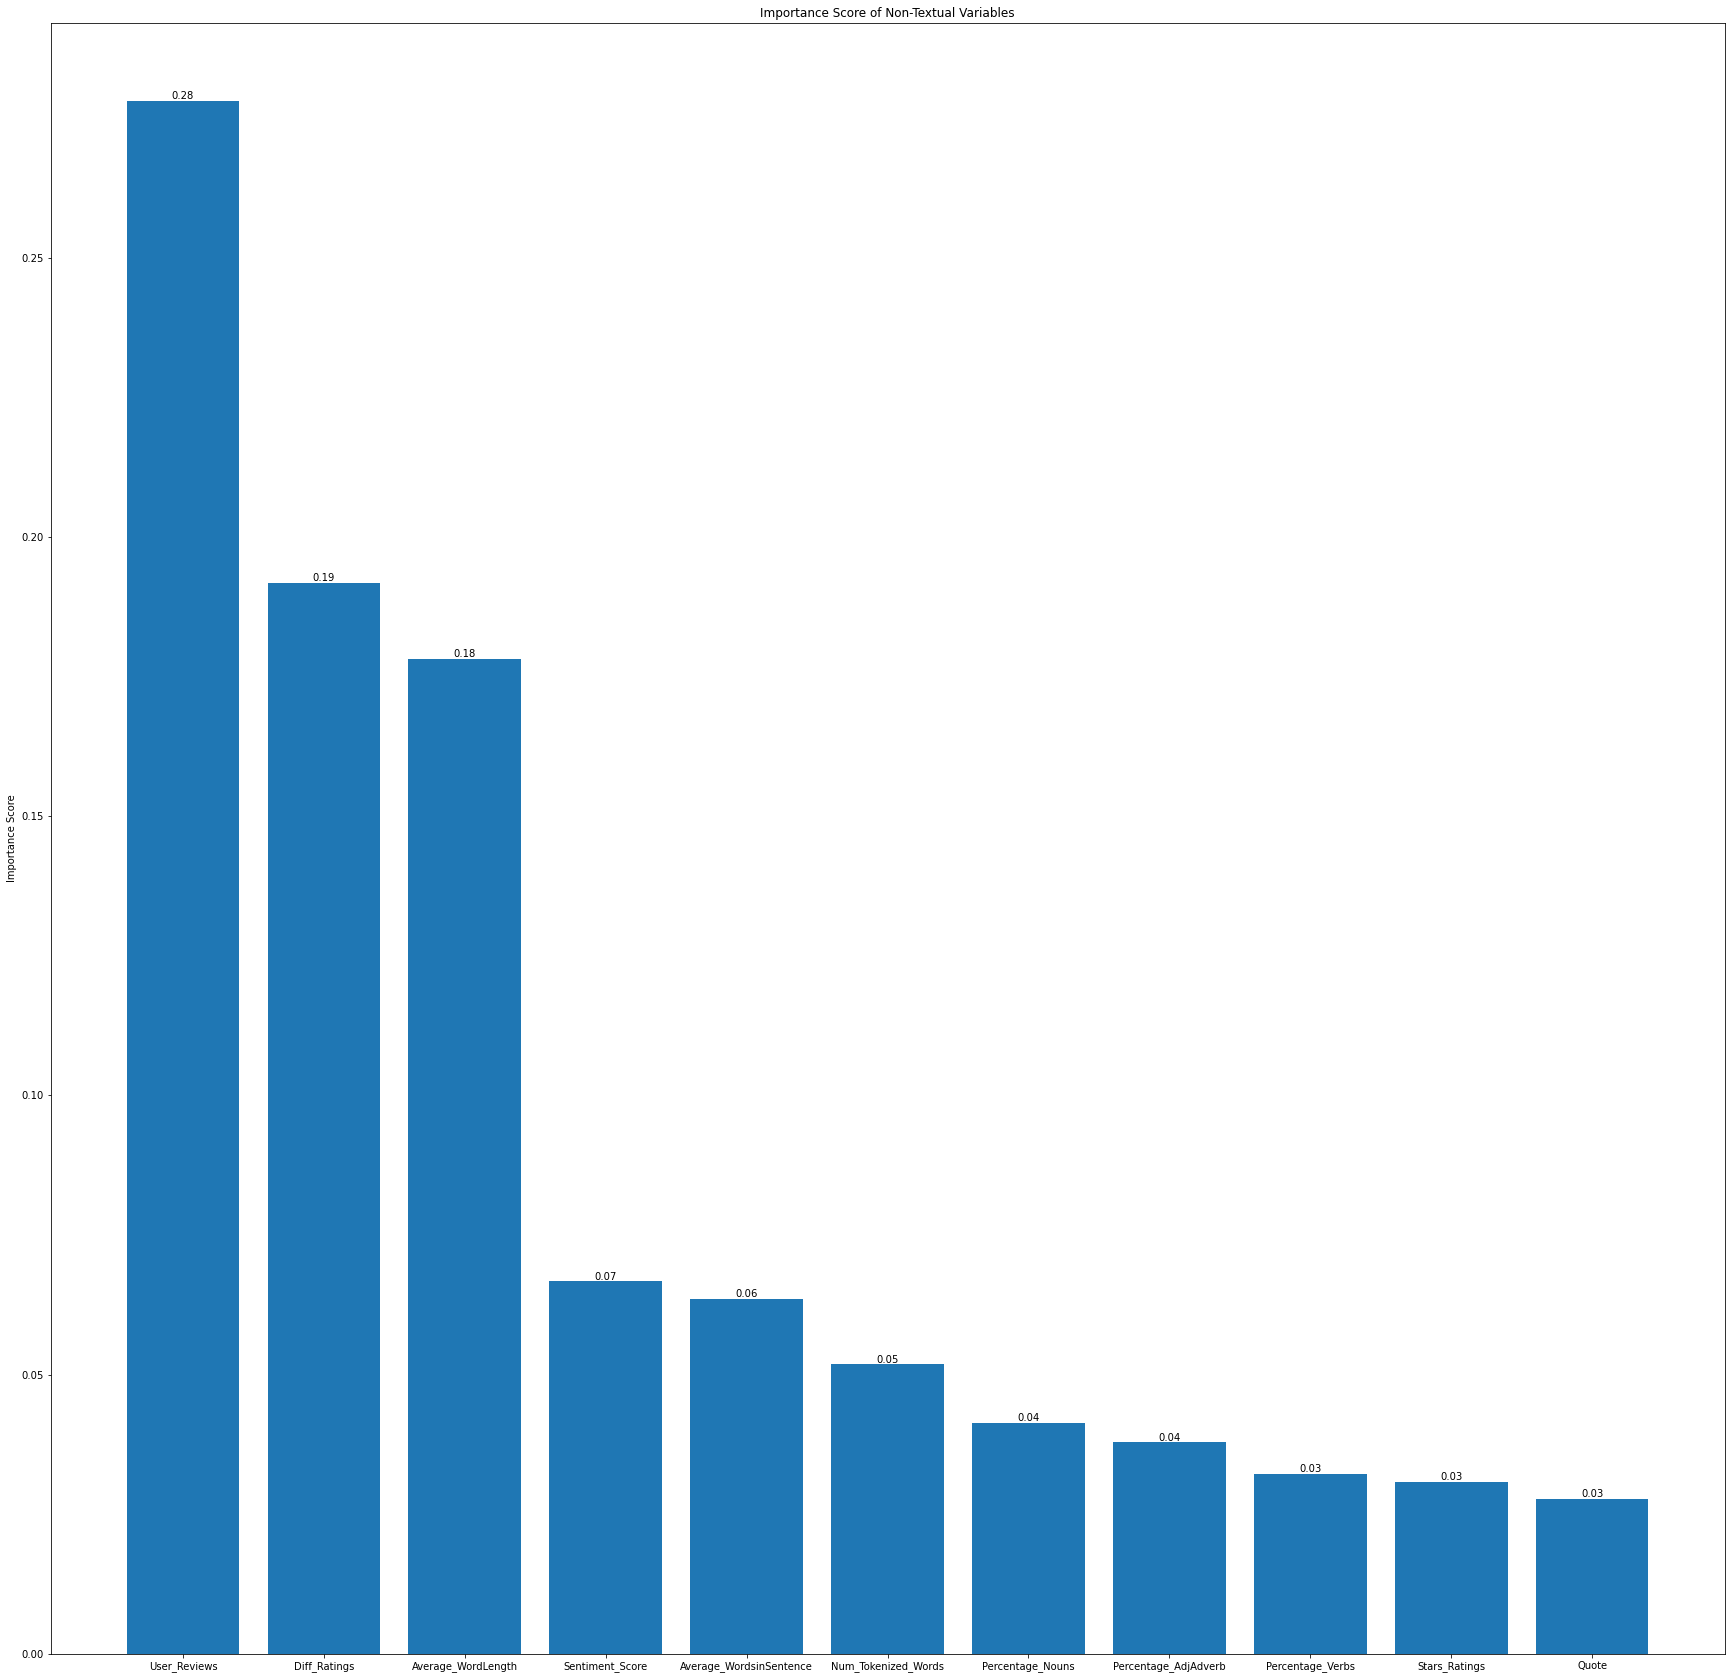

In [196]:
#Bar Plot to show Importance Score of each Non-Textual variables
variables = ('User_Reviews', 'Diff_Ratings', 'Average_WordLength', "Sentiment_Score", "Average_WordsinSentence", "Num_Tokenized_Words", "Percentage_Nouns", "Percentage_AdjAdverb", "Percentage_Verbs", "Stars_Ratings", "Quote" )
fig, ax = plt.subplots(figsize=(30,30))
data = GridSearch_xgb_model.best_estimator_.feature_importances_
data = sorted(data, reverse=True) 
rects1 = ax.bar(variables, data, label = "Importance Score", align = "center")
ax.set_ylabel('Importance Score')
ax.set_title('Importance Score of Non-Textual Variables')
ax.bar_label(rects1, fmt='%.2f')
plt.show()

# Analysis of training and testing set for Non-Textual and Textual prediction
Has quite high TNR and FNR, and low TPR as well as FPR.

# Comparison of of Textual, Non-Textual, and Textual+Non-Textual prediction
Both exhibit same characteristics (high in TNR and FNR, as well as lower in TPR and FPR)

Accuracy of prediction is highest with Textual+Non-Textual prediction. 

# Conclusion:
Accuracy of prediction is highest with Textual+Non-Textual prediction. 